
# Segmentação de Clientes Por Consumo no Cartão de Crédito

## Problema de Negócio
### Identificar e Segmentar os Clientes por meio dos registros de compras com cartão de crédito, com o objetivo de tornar as campanhas de MKT mais efetivas.

### Carregando os Pacotes

In [1]:
# Imports

# Manipulação e visualização de dados
import sklearn
import numpy as np
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

### 1 - Análise Exploratória

In [2]:
# Carregando o dataset
df_cc = pd.read_csv("dados/CC GENERAL.csv", encoding = 'utf-8')

In [3]:
# Shape
df_cc.shape

(8950, 18)

In [4]:
# Visualiza os dados
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Dicionário de dados
    
<b>CUSTID</b>  : Identification of Credit Card holder Categorical  
<b>BALANCE</b> : Balance amount left in their account to make"purchases  
<b>BALANCEFREQUENCY</b> : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not           frequently updated  
<b>PURCHASES</b> : Amount of purchases made from account    
<b>ONEOFFPURCHASES</b> : Maximum purchase amount done in one-go  
<b>INSTALLMENTSPURCHASES</b> : Amount of purchase done in installment  
<b>CASHADVANCE</b> : Cash in advance given by the user  
<b>PURCHASESFREQUENCY</b> : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)  
<b>ONEOFFPURCHASESFREQUENCY</b> : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)  
<b>PURCHASESINSTALLMENTSFREQUENCY</b> : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)  
<b>CASHADVANCEFREQUENCY</b> : How frequently the cash in advance being paid  
<b>CASHADVANCETRX</b> : Number of Transactions made with "Cash in Advanced"  
<b>PURCHASESTRX</b> : Numbe of purchase transactions made  
<b>CREDITLIMIT</b> : Limit of Credit Card for user  
<b>PAYMENTS</b> : Amount of Payment done by user  
<b>MINIMUM_PAYMENTS</b> : Minimum amount of payments made by user  
<b>PRCFULLPAYMENT</b> : Percent of full payment paid by user  
<b>TENURE</b> : Tenure of credit card service for user  

Dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

In [5]:
#Verifica e soma os valores missing
df_cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Preechendo os valores faltantes na coluna CREDIT_LIMIT e na coluna MINIMUM_PAYMENTS com a mediana.
df_cc = df_cc.fillna( df_cc.median() )

In [7]:
# Verifica o total de valores únicos por coluna
df_cc.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [8]:
# Tipos de dados
df_cc.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [9]:
# Resumo das colunas numéricas
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 2 - Clusterização


In [10]:
# Após a análise exploratória foi definido as variávies relevantes conforme o objetivo do problema de negócio a ser resolvido.
Col_relevantes = ["BALANCE", "PURCHASES","CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS"]

In [11]:
# Lista do WCSS (within-cluster sum of squares)
wcss = []

#### Gráfico Elbow

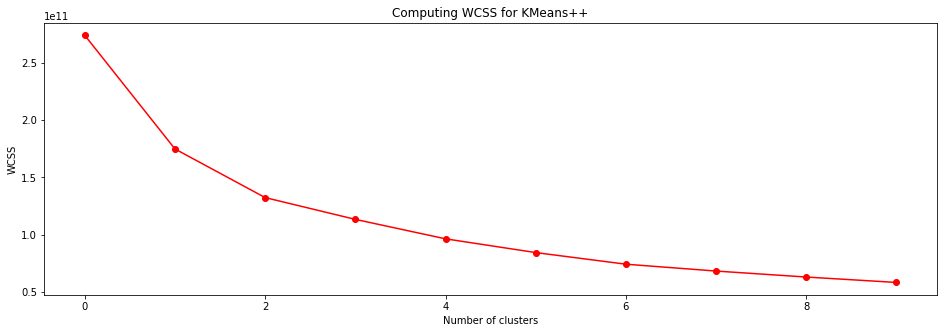

In [12]:
# Loop para testar os valores de K
for i in range(1, 11):
     kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300)
     X1 = df_cc[Col_relevantes].iloc[ :, 1:].values
     kmeans.fit_predict(X1)
     wcss.append(kmeans.inertia_) 
        
plt.figure(1 , figsize = (16 ,5))    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

#### Construindo e Treinando o Modelo

In [13]:
# Criação do modelo
modelo_X1 = KMeans(n_clusters = 5, 
                     init = 'k-means++', 
                     n_init = 10, 
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan')

In [14]:
# Treinamento do modelo
modelo_X1.fit(X1)

KMeans(algorithm='elkan', n_clusters=5, random_state=111)

**Extração das labels dos Clusters**

In [15]:
# Extração dos labels
labels1 = modelo_X1.labels_
labels1

array([0, 3, 3, ..., 0, 0, 0])

In [16]:
# Shape dos labels
labels1.shape

(8950,)

In [17]:
# Tipo
type(labels1)

numpy.ndarray

In [18]:
# Converte o array para dataframe
df_labels = pd.DataFrame(labels1)

In [19]:
# Visualiza
df_labels.head(5)

,0
0,0
1,3
2,3
3,3
4,0


In [20]:
# Tipo
type(df_labels)

pandas.core.frame.DataFrame

**Criando o DataFrame com Clusters**

In [21]:
# Criado o dataframe só com as variavéis relevantes 
df_cc_Col_relevantes = pd.DataFrame(df_cc[Col_relevantes])
# Adicionado a Coluna com as labels dos clusters
df_cc_Col_relevantes = df_cc_Col_relevantes.merge(df_labels, left_index = True, right_index = True)
# Renomeado o coluna das Labels para "CLUSTERS"
df_cc_Col_relevantes.rename(columns={ 0:"CLUSTER"}, inplace=True)
df_cc_Col_relevantes.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,CLUSTER
0,40.900749,95.40,0.000000,1000.0,201.802084,0
1,3202.467416,0.00,6442.945483,7000.0,4103.032597,3
2,2495.148862,773.17,0.000000,7500.0,622.066742,3
3,1666.670542,1499.00,205.788017,7500.0,0.000000,3
4,817.714335,16.00,0.000000,1200.0,678.334763,0


In [22]:
# Agrupamento das médias pelo Clusters
df_cc_Col_relevantes.groupby("CLUSTER").aggregate("mean")

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
CLUSTER,,,,,
0,811.988835,486.205187,459.277647,2096.923922,839.095839
1,3929.004202,1890.080888,1793.845277,12165.024331,2505.264727
2,4191.834772,3222.207536,6725.533945,9334.480519,11545.151468
3,1996.789423,1264.601923,1138.204980,6221.821084,1955.301244
4,5770.381639,25503.422593,1451.678425,16462.962963,27548.251648


In [23]:
# metódo describe para efeito comparativo da médias dos Clusters para a base toda
df_cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 3 - Análises dos Clusters

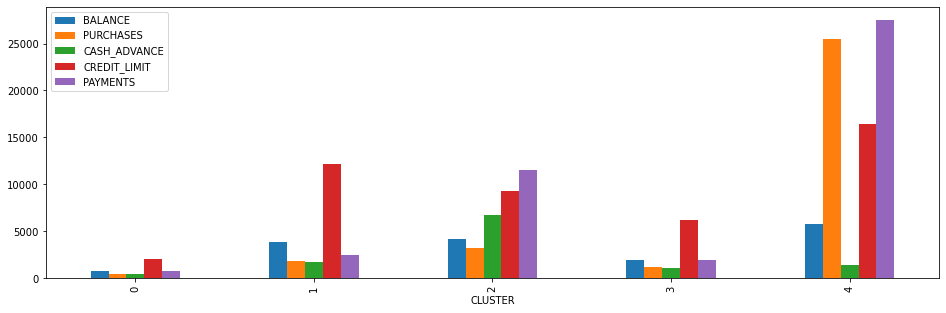

In [24]:
# Criação do gráfico de barras para análise dos clusters
df_cc_Col_relevantes.groupby("CLUSTER").aggregate("mean").plot.bar(figsize=(16,5))


<b> Cluster 0 - Clientes que compram pouco e com baixo limite de crédito, pouco atrativos comercialmente </b>  
Cluster com consumers que gastam pouco, com valores baixos em: compras, montante disponível na conta para compras ,valores pagos adiantados, pagamentos, o destaque vai para o limite de crédito disponível 0,46x da média da base.  
<b> Cluster 1 - Com potencial de expansão </b>  
Cluster com consumers com limite de crédito de mais que o dobro (2,7x) da média de toda base, com valor disponível na conta para fazer compras 2,51x maior que a média, porém com baixos valores em compras, pagamentos, valores pagos adiantados, sendo este certamente um agrupamento que tem espaço para ser explorado comercialmente, uma vez que os recursos disponíveis em conta e limite de crédito, não estão refletindo em compras.  
<b> Cluster 2 - Clientes que compram e pagam adiantado </b>  
Cluster que em relação a média de compras é o que mais faz pagamentos e o maior montante de pagamentos adiantados, com terceiro maior limite de crédito e 2º maior montante em conta para fazer compras, claramente um agrupamento que compra e o faturamento se torna ativo líquido para o fluxo de caixa.   
<b> Cluster 3 - Clientes que podem ser trabalhados para serem mais ativos</b>  
CLuster com consumers que possuem limite de créditopara compras que pode ser explorado, níveis baixos de compras, pagamentos e pagamentos adiantados.  
<b> Cluster 4 - Clientes que compram mais - devem ser sempre estimulados com novos produtos e ofertas de alto valor </b>  
Cluster como os consumers que mais compram, com um nível alto em pagamentos, compras(25x) em relação a média, com limite de crédito muito superior a base, que pagam pouco adiantatado, com média de montante para fazer compras na contas similar aos clusters 1 e 2, o que reforça a característica de compradores altamente ativos.  

In [25]:
# Vamos fazer o merge de df_cc e os labels (clusters) encontrados pelo modelo
df_cc_final = df_cc.merge(df_labels, left_index = True, right_index = True)
df_cc_final.rename(columns={ 0:"CLUSTER"}, inplace=True)

In [26]:
# Visualiza
df_cc_final_csv = df_cc_final.to_csv("Base Clusterizada CC.csv", encoding="utf-8", index=False)
df_cc_final

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


### 4 - Entrega - Relatório Final

### Relatório Final 

Análise dos Clusters  
Arquvo .csv com base Clusterizada por Cliente

<b>https://drive.google.com/file/d/1ivlodxwRBvYO6f5rYTrRV7CnTVxelg7Y/view?usp=sharing</b>